In [69]:
import pandas as pd
customers=pd.read_csv('/content/Customers.csv')
products=pd.read_csv('/content/Products.csv')
transactions=pd.read_csv('/content/Transactions.csv')

In [70]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

In [71]:
customer_transactions = pd.merge(transactions, customers ,on='CustomerID',how='left')

In [72]:
customer_transactions = pd.merge(customer_transactions, products, on='ProductID',how='left')

In [73]:
customer_transactions.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [74]:
customer_transactions['TransactionAmount'] = customer_transactions['Quantity'] * customer_transactions['Price_y']
customer_transactions['TotalSpending'] = customer_transactions.groupby('CustomerID')['TransactionAmount'].transform('sum')

In [75]:
features = customer_transactions.columns[customer_transactions.columns.isin(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'TotalSpending'])].tolist()
print("\nSelected Features:")
print(features)


Selected Features:
['TotalSpending']


In [76]:
X = customer_transactions[features]

In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [78]:
best_db_index = float('inf')
best_n_clusters = 0

In [79]:
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    db_index = davies_bouldin_score(X_scaled, labels)

    if db_index < best_db_index:
        best_db_index = db_index
        best_n_clusters = n_clusters

In [80]:
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled)

In [81]:
customer_transactions['Cluster'] = labels

In [84]:
annual_income_col = 'TotalValue'
spending_score_col = 'TotalSpending'


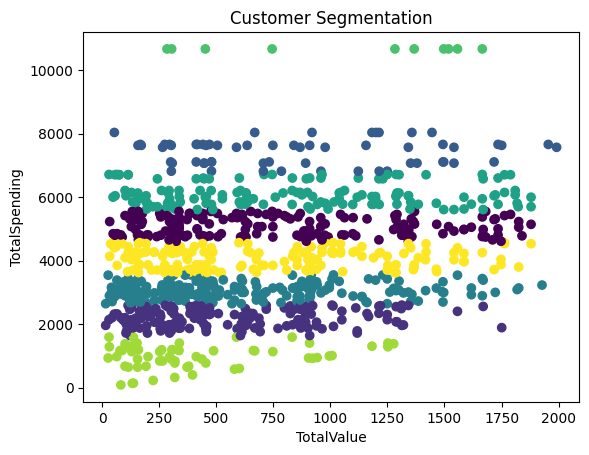

In [85]:
plt.scatter(customer_transactions[annual_income_col], customer_transactions[spending_score_col], c=customer_transactions['Cluster'])
plt.xlabel(annual_income_col)
plt.ylabel(spending_score_col)
plt.title('Customer Segmentation')
plt.show()

In [48]:
plt.scatter(customer_transactions['Annual Income (k$)'], customer_transactions['Spending Score (1-100)'], c=customer_transactions['Cluster'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation')
plt.show()

KeyError: 'Annual Income (k$)'